# Loading & Exploring the dataset



In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data_frame = pd.read_csv('/content/spam.csv', encoding = 'latin-1')

In [ ]:
data_frame.head() # returns starting tuples from dataframe

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data_frame.sample(5)  # returns random 5 tuples from dataframe

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1201,ham,I know she called me,NaN,NaN,NaN
2637,ham,No I don't have cancer. Moms making a big deal...,NaN,NaN,NaN
3591,ham,I anything lor...,NaN,NaN,NaN
2096,ham,I'm done...,NaN,NaN,NaN
1507,ham,"Wen ur lovable bcums angry wid u, dnt take it ...",NaN,NaN,NaN


In [ ]:
data_frame.shape    # returns shape(no. of rows & no. of columns) of dataframe

(5572, 5)

# Data Cleaning

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# drop last three columns
data_frame.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

# inplace = true, This argument modifies the original DataFrame in place. It means that the changes (i.e., dropping the columns) will be applied directly to data_frame, and it won't return a new DataFrame. If you set inplace = False (which is the default), it would return a new DataFrame with the columns dropped, and you'd have to assign it back to a variable.

In [ ]:
data_frame.sample(5)

,v1,v2
3741,ham,Hey i'm bored... So i'm thinking of u... So wa...
4388,ham,"K I'm ready, &lt;#&gt; ?"
156,ham,I'm leaving my house now...
5518,ham,"By the way, i've put a skip right outside the ..."
4949,ham,Hi its me you are probably having too much fun...


In [ ]:
# renaming the columns
data_frame.rename(columns = {'v1' : 'target', 'v2' : 'mail'}, inplace = True)
# data_frame = data_frame.rename(columns = {'v1' : 'target', 'v2' : 'mail'})
data_frame.sample(5)

,target,mail
4369,spam,Do you want a new Video handset? 750 any time ...
5243,ham,Of course ! Don't tease me ... You know I simp...
3904,spam,Do you want a new video handset? 750 anytime a...
5372,ham,"Ok., is any problem to u frm him? Wats matter?"
4871,ham,Hi dis is yijue i would be happy to work wif Ì...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() # created object of LabelEncoder class

In [ ]:
data_frame['target'] = encoder.fit_transform(data_frame['target'])

# ham = 0, spam = 1

In [ ]:
data_frame.head()

,target,mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data_frame.isnull().sum()

,0
target,0
mail,0


In [ ]:
# check for duplicate values
data_frame.duplicated().sum()

403

In [ ]:
data_frame.drop_duplicates(keep = 'first', inplace = True)

# keep='first': This argument specifies which duplicate to keep when multiple duplicates are found.

In [ ]:
data_frame.duplicated().sum()

0

In [ ]:
data_frame.shape

(5169, 2)

#EDA

In [ ]:
data_frame['target'].value_counts()

,count
target,
0,4516
1,653


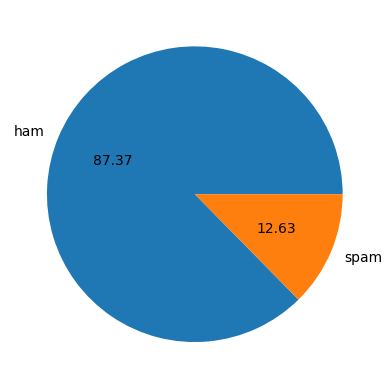

In [ ]:
import matplotlib.pyplot as plt
plt.pie(data_frame['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [ ]:
# data is imbalanced

In [ ]:
import nltk   # natural language tool kit
nltk.download('punkt_tab')    #this line will install dependencies for nltk to work in this environment

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
data_frame['characters_in_mail'] = data_frame['mail'].apply(len)

In [ ]:
data_frame.head()

,target,mail,characters_in_mail
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
data_frame['words_in_mail'] = data_frame['mail'].apply(lambda x : len(nltk.word_tokenize(x)))

In [ ]:
data_frame.head()

,target,mail,characters_in_mail,words_in_mail
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
data_frame['sentences_in_mail'] = data_frame['mail'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [ ]:
data_frame.head()

,target,mail,characters_in_mail,words_in_mail,sentences_in_mail
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
data_frame[['characters_in_mail', 'words_in_mail', 'sentences_in_mail']].describe()

,characters_in_mail,words_in_mail,sentences_in_mail
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
data_frame[data_frame['target'] == 0][['characters_in_mail', 'words_in_mail', 'sentences_in_mail']].describe()

,characters_in_mail,words_in_mail,sentences_in_mail
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
data_frame[data_frame['target'] == 1][['characters_in_mail', 'words_in_mail', 'sentences_in_mail']].describe()

,characters_in_mail,words_in_mail,sentences_in_mail
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


# Data Preprocessing
1. lower case
2. Tokenization
3. Remove special characters
4. Remove stop words & punctuation
5. Stemming

In [ ]:
import nltk
nltk.download('stopwords')  # output of this line is list of stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation    # this shows list of punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
# ps.stem('eating')

In [ ]:
def text_transform(message):
  message = message.lower()
  message = nltk.word_tokenize(message)

  y = []
  for i in message:
    if i.isalnum():
      y.append(i)

  message = y[:]
  y.clear()

  for i in message:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  message = y[:]
  y.clear()

  for i in message:
      y.append(ps.stem(i))

  return " ".join(y)   # this line will convert the list in string and returns the string

In [ ]:
text_transform("LMAO where's your fish memory when I need it?")

'lmao fish memori need'

In [ ]:
data_frame['transformed_mail'] = data_frame['mail'].apply(text_transform)

In [ ]:
data_frame.head()

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [ ]:
spam_wordcloud = wc.generate(data_frame[data_frame['target'] == 1]['transformed_mail'].str.cat(sep = " "))
plt.imshow(spam_wordcloud)  # this will create an inage of frequent use words in spam messages

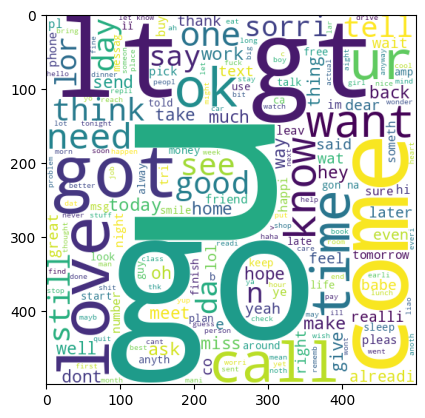

In [ ]:
ham_wordcloud = wc.generate(data_frame[data_frame['target'] == 0]['transformed_mail'].str.cat(sep = " "))
plt.imshow(ham_wordcloud) # this will create an inage of frequent use words in ham messages

In [ ]:
spam_corpus = []
for message in data_frame[data_frame['target'] == 1]['transformed_mail'].tolist():
  for word in message.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter
# Counter(spam_corpus).most_common(30)    # this will return 30 most frequent words in spam mails
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [ ]:
ham_corpus = []
for message in data_frame[data_frame['target'] == 0]['transformed_mail'].tolist():
  for word in message.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

In [ ]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))   # this will return 30 most frequent words in ham mails

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


# 4. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [ ]:
x = cv.fit_transform(data_frame['transformed_mail']).toarray()

In [ ]:
x.shape

(5169, 6708)

In [ ]:
y = data_frame['target'].values  # it will convert target column values in numpy array

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import  train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_prediction = gnb.predict(x_test)
print("For GaussianNB model: ")
print("Accuracy score: ", accuracy_score(y_test,y_prediction))
print("Confusion matrix: \n", confusion_matrix(y_test,y_prediction))
print("Precision score: ", precision_score(y_test,y_prediction), "\n")

mnb.fit(x_train,y_train)
y_prediction = mnb.predict(x_test)
print("For MultinomialNB model: ")
print("Accuracy score: ", accuracy_score(y_test,y_prediction))
print("Confusion matrix: \n", confusion_matrix(y_test,y_prediction))
print("Precision score: ", precision_score(y_test,y_prediction), "\n")

bnb.fit(x_train,y_train)
y_prediction = bnb.predict(x_test)
print("For BernoulliNB model: ")
print("Accuracy score: ", accuracy_score(y_test,y_prediction))
print("Confusion matrix: \n", confusion_matrix(y_test,y_prediction))
print("Precision score: ", precision_score(y_test,y_prediction), "\n")

For GaussianNB model: 
Accuracy score:  0.8800773694390716
Confusion matrix: 
 [[792 104]
 [ 20 118]]
Precision score:  0.5315315315315315 

For MultinomialNB model: 
Accuracy score:  0.9642166344294004
Confusion matrix: 
 [[871  25]
 [ 12 126]]
Precision score:  0.8344370860927153 

For BernoulliNB model: 
Accuracy score:  0.9700193423597679
Confusion matrix: 
 [[893   3]
 [ 28 110]]
Precision score:  0.9734513274336283 



In [ ]:
# in case of spam email detectioin, we want maximum precision score.
# we want to increase value of TP & decrease value of FP.
# after checking the results, i decided to use Bernoulli Naive Bais model to train our model

In [ ]:
import pickle
pickle.dump(bnb, open('model.pkl', 'wb'))
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))